[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AxelSkrauba/Taller_Signals/blob/main/2_Frecuencia/Analisis_Frecuencial.ipynb)

# Respuesta en Frecuencia de las Señales

# Senoidales

## Librerías y Funciones

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def senoidal(amplitud, frecuencia, tiempo=1):
    """
    Genera una señal senoidal.
    Esta función genera una señal senoidal en función de los parámetros especificados.

    Parámetros:
    ----------
    amplitud : float
        La amplitud de la señal senoidal.
    frecuencia : float
        La frecuencia de la señal senoidal en hertz (Hz).
    tiempo : float, opcional
        La duración total de la señal en segundos. Por defecto, es 1 segundo.

    Retorna:
    -------
    tuple
        Una tupla que contiene dos arrays NumPy: el primero es el array de tiempo y el segundo es el array de valores de la señal senoidal.

    Ejemplos:
    --------
    # Generar una señal senoidal con amplitud 2, frecuencia 5 Hz y duración de 2 segundos
    tiempo, senial = senoidal(2, 5, 2)

    # Generar una señal senoidal con amplitud 1.5, frecuencia 10 Hz y duración de 0.5 segundos
    tiempo, senial = senoidal(1.5, 10, 0.5)
    """
    tiempo = np.linspace(0, tiempo, 16384)
    w = 2 * np.pi * frecuencia
    senial_t = amplitud * np.sin(w * tiempo)  # Amplitud x seno
    return tiempo, senial_t


from scipy.fft import fft, fftfreq

def plot_fft(signal, fs):
  N = len(signal)                   # Puntos para la FFT
  signal_fft = fft(signal, n=N)     # Se calcula la FFT
  xf = fftfreq(N, 1/fs)             # Vector de frecuencias, para los bins de la FFT de N puntos calculada

  plt.plot(xf[:len(xf)//2], abs(signal_fft[:len(signal_fft)//2]))
  plt.xlabel("Frecuencia (Hz)")
  plt.ylabel("Amplitud")
  plt.title("FFT de la Señal Temporal")
  plt.grid(True)
  plt.show()

## Ejemplo Sencillo

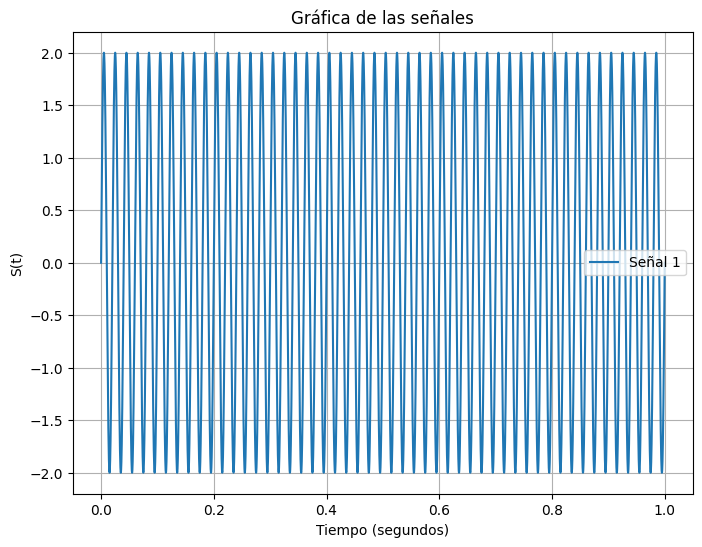

In [132]:
t1, s1 = senoidal(amplitud=2, frecuencia=50, tiempo=1)

plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t1, s1, label='Señal 1')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
ts = t1[1] - t1[0]   # Delta tiempo entre muestras, tiempo de muestreo
fs = 1/ts           # La inversa, es la frecuencia de muestreo
fs

16383.0

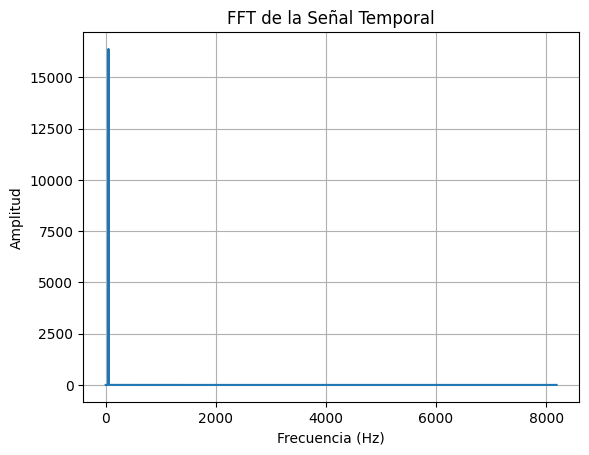

In [134]:
plot_fft(signal=s1, fs=fs)

In [135]:
from IPython.display import Audio

# Reproducir la señal
Audio(s1, rate=fs)

## Señales Combinadas

In [136]:
tiempo = 1
t_comb, s1 = senoidal(amplitud=0.5, frecuencia=750, tiempo=tiempo)
_, s2 = senoidal(amplitud=1, frecuencia=200, tiempo=tiempo)
_, s3 = senoidal(amplitud=2, frecuencia=500, tiempo=tiempo)
_, s4 = senoidal(amplitud=3.2, frecuencia=1500, tiempo=tiempo)

s_combinada = s1 + s2 + s3 + s4

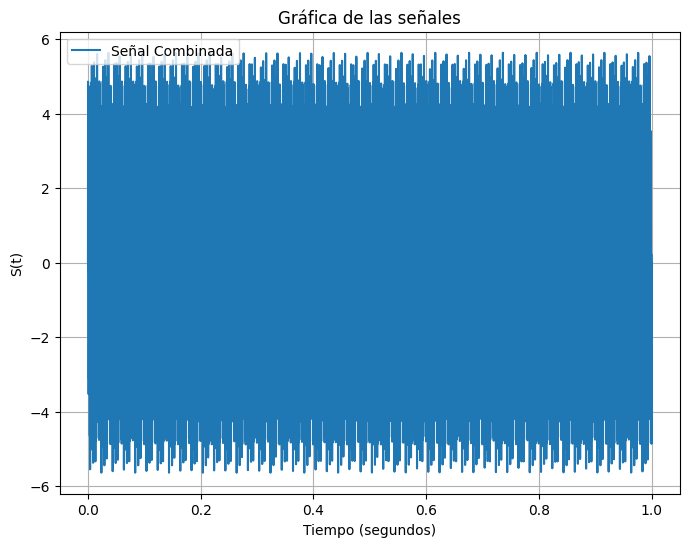

In [137]:
plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t_comb, s_combinada, label='Señal Combinada')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

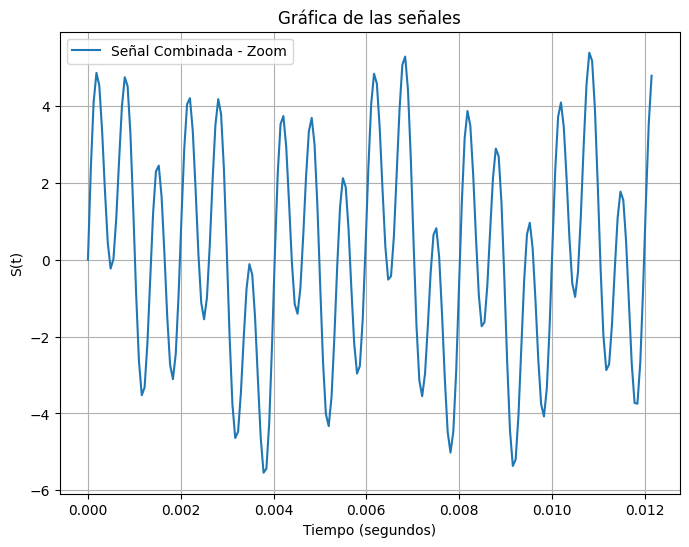

In [138]:
zoom = 200
plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t_comb[:zoom], s_combinada[:zoom], label='Señal Combinada - Zoom')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
ts = t_comb[1] - t_comb[0]   # Delta tiempo entre muestras, tiempo de muestreo
fs = 1/ts           # La inversa, es la frecuencia de muestreo
fs

16383.0

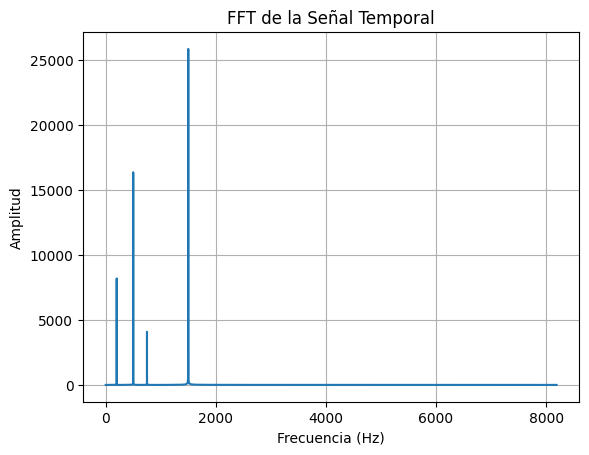

In [140]:
plot_fft(signal=s_combinada, fs=fs)

In [141]:
# Reproducir la señal
Audio(s_combinada, rate=fs)

## Interactivo - Test Audición

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def plot_periodic_signal(frequency):
    fs = 44100
    t = np.arange(0, 1, 1/fs)
    w = 2 * np.pi * frequency
    signal = np.sin(w * t)

    plt.figure(figsize=(12, 6))
    plt.subplot(1,2,1)
    plt.plot(t[:200], signal[:200])
    plt.title(f"Señal senoidal periódica: Frecuencia = {frequency} Hz - Zoom")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.subplot(1,2,2)
    plot_fft(signal=signal, fs=fs)
    plt.show()
    display(Audio(signal, rate=fs, autoplay=True))

In [143]:
frequency_slider = widgets.FloatSlider(value=1000.0, min=0.0, max=20000.0, step=50.0, description='Frecuencia (Hz)')

interactive_plot = interactive(
    plot_periodic_signal,
    frequency=frequency_slider,
)

output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=1000.0, description='Frecuencia (Hz)', max=20000.0, step=50.0), Output…

# Señal Cuadrada

In [151]:
def cuadrada(amplitud, frecuencia, tiempo=1, duty_cycle=0.5):
    """
    Genera una señal cuadrada.
    Esta función genera una señal cuadrada en función de los parámetros especificados.

    Parámetros:
    ----------
    amplitud : float
        La amplitud de la señal cuadrada.
    frecuencia : float
        La frecuencia de la señal cuadrada en hertz (Hz).
    tiempo : float, opcional
        La duración total de la señal en segundos. Por defecto, es 1 segundo.
    duty_cycle : float, opcional
        El ciclo de trabajo de la señal cuadrada, en el rango de 0.0 a 1.0. Por defecto, es 0.5.

    Retorna:
    -------
    tuple
        Una tupla que contiene dos arrays NumPy: el primero es el array de tiempo y el segundo es el array de valores de la señal cuadrada.

    Ejemplos:
    --------
    # Generar una señal cuadrada con amplitud 2, frecuencia 5 Hz y duración de 2 segundos
    tiempo, senial = cuadrada(2, 5, 2)

    # Generar una señal cuadrada con amplitud 1.5, frecuencia 10 Hz, duración de 0.5 segundos y ciclo de trabajo 0.3
    tiempo, senial = cuadrada(1.5, 10, 0.5, 0.3)
    """
    tiempo = np.linspace(0, tiempo, 16384)  # Crear un array de tiempo
    periodo = 1 / frecuencia  # Calcular el período
    num_pulsos = int(tiempo[-1] / periodo)  # Calcular el número de pulsos en el tiempo dado
    pulsos = np.zeros_like(tiempo)  # Crear un array para almacenar los valores de los pulsos

    for i in range(num_pulsos):
        t_inicio = i * periodo
        t_fin = t_inicio + periodo * duty_cycle
        pulsos[(tiempo >= t_inicio) & (tiempo <= t_fin)] = amplitud

    return tiempo, pulsos

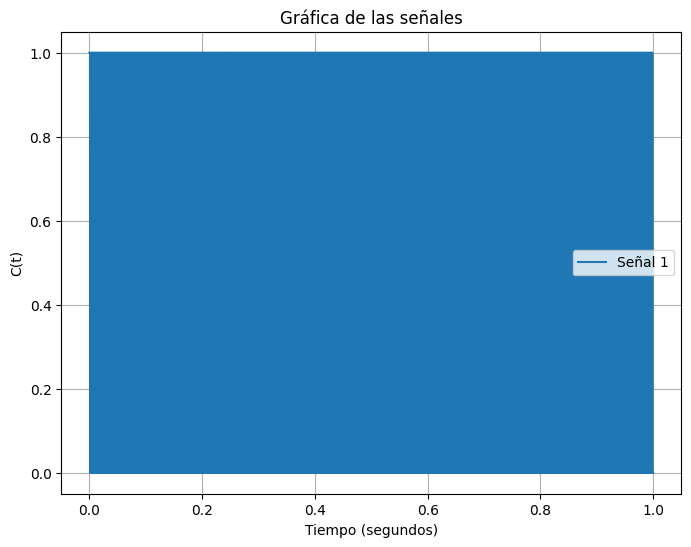

In [152]:
t1, s1 = cuadrada(amplitud=1, frecuencia=500)

plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t1, s1, label='Señal 1')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('C(t)')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
ts = t1[1] - t1[0]   # Delta tiempo entre muestras, tiempo de muestreo
fs = 1/ts           # La inversa, es la frecuencia de muestreo

Audio(s1, rate=fs)

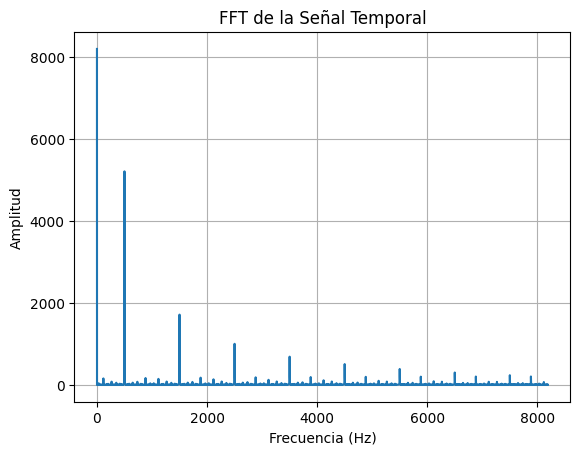

In [153]:
plot_fft(signal=s1, fs=fs)

# Referencias

*   [Numpy](https://numpy.org/doc/stable/index.html)
*   [Matplotlib](https://matplotlib.org/)
*   [Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/)
*   [Fourier Transforms](https://docs.scipy.org/doc/scipy/tutorial/fft.html)